In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn xgboost


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
data = pd.read_csv("/content/data.csv")
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)


In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


In [ ]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.9736842105263158


In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Accuracy: 0.956140350877193


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.9649122807017544


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))


XGBoost Accuracy: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:37:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


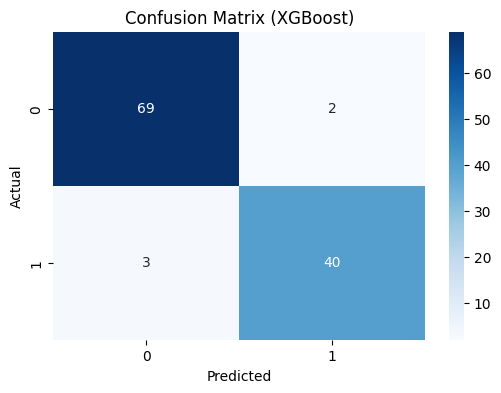

In [ ]:
cm = confusion_matrix(y_test, xgb_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (XGBoost)")
plt.show()


In [ ]:
print(classification_report(y_test, xgb_pred))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



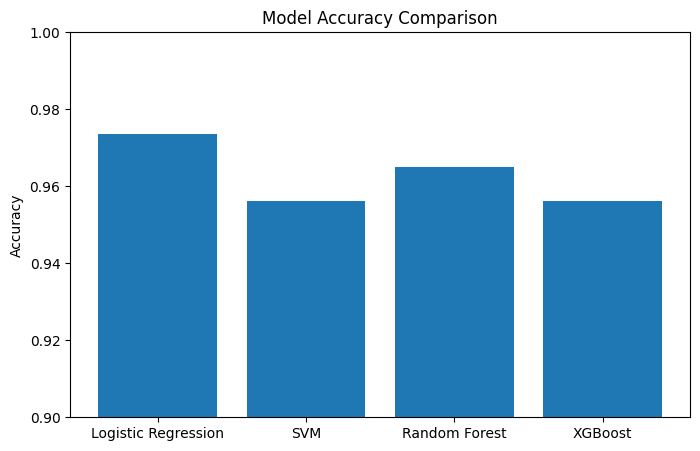

In [ ]:
models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, xgb_pred)
]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.9,1.0)
plt.show()


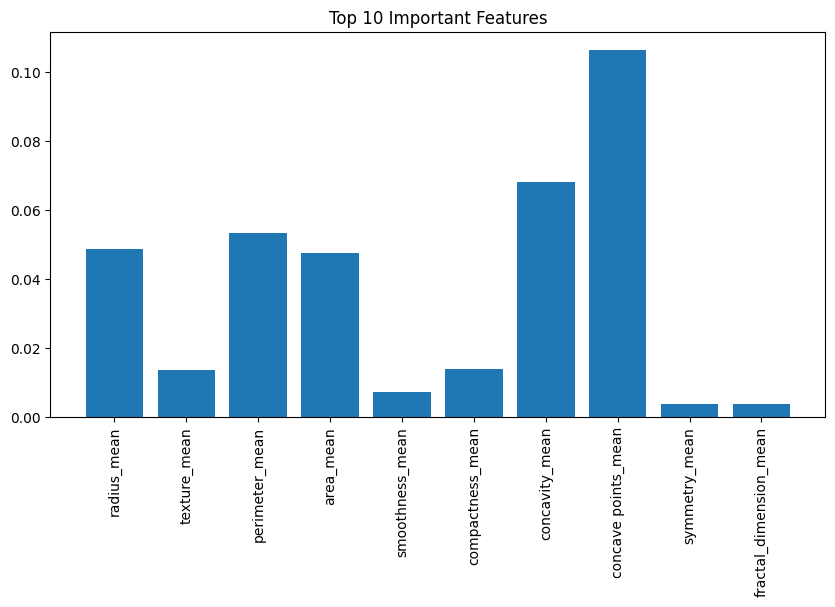

In [ ]:
importances = rf.feature_importances_
features = data.drop('diagnosis', axis=1).columns

plt.figure(figsize=(10,5))
plt.bar(features[:10], importances[:10])
plt.xticks(rotation=90)
plt.title("Top 10 Important Features")
plt.show()
